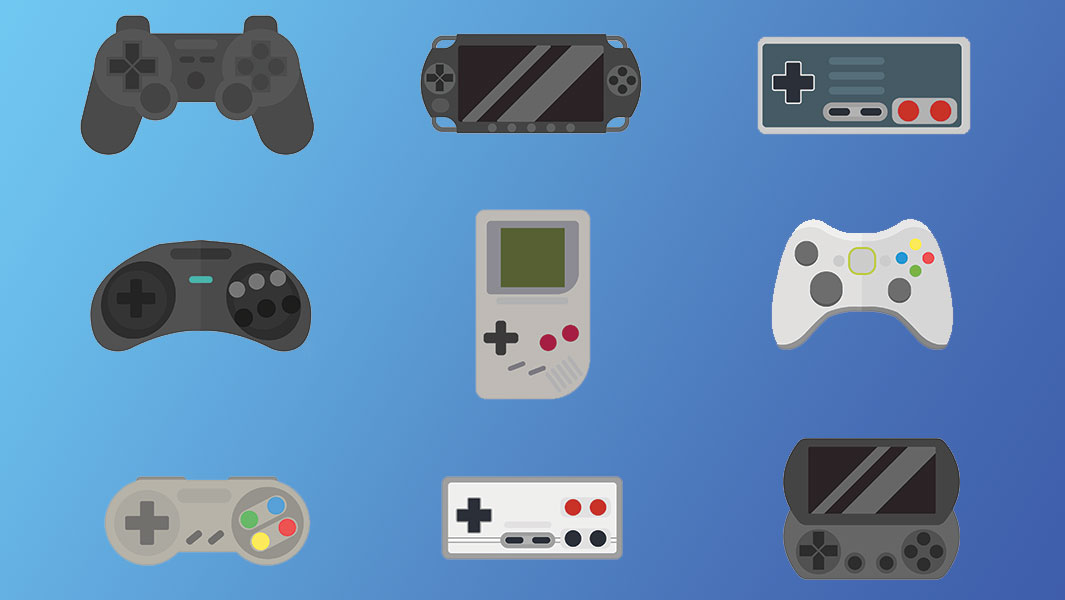

<p style="text-align:center;">For as long as I can remember, videeo games have been a staple in my life. Whether I'm connecting with friends and family, or people I may never talk to again. I've always played something! However, I have never thought about which platforms, publishers, and genre's are responsible for the bulk of the sales and quality of the games we all love to play. In this analysis, i would like to take a deep dive into the three categories mentioned above. I'll focus on these questions to better direct the focus, and shape of the analysis.

1. What are the global sales looking like over time?.

2. What platforms(consoles/pc) are responsible for the bulk of the games being played?.

3. Who are the top publishers, and why are they the top?.

4. And finally, what categories(Genre's) of games are people playing?

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

# <p style="text-align:center;">Importing libraries and Data

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly
import matplotlib.pyplot as plt
import re

from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency
from wordcloud import wordcloud

In [ ]:
df_train = pd.read_csv('../input/videogamesales/vgsales.csv')

df_train.head(5)

In [ ]:
df_train.info()

## as seen below 2 columns are missing values. 
## we will drop the samples with missing values

In [ ]:
##1. Drop the samples with missing values
##2. index needs to be reset after deleted samples
##3. updating rank column after reset

df_train = df_train.dropna()

df_train = df_train.reset_index(drop = True)

df_train.loc[:, 'Rank'] = np.arange(df_train.shape[0])+1

<a id="1"></a>

<h1 style="background-color:#AEB6BF;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:#AEB6BF 12px 50px;">📌As shown in df_train.info...the year is showing floating point number. We will change that to an integer for display purposes.

In [ ]:
df_train['Year'] = df_train['Year'].astype(int)

#  <p style="text-align:center;">Overall Sales Analysis</p>

 Global sales by millions

In [ ]:
fig = px.box(df_train, y="Global_Sales", points="all", height = 400, color_discrete_sequence = px.colors.sequential.Plasma_r)


fig.show()

<a id="1"></a>

<h1 style="background-color:#AEB6BF;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:#AEB6BF 12px 30px;">📌As shown in the figure above, most of the sales fall within the value range of 10. We will use that information with the next plots.

In [ ]:
t1 = df_train[df_train['Global_Sales'] < 10]

fig = px.histogram(t1, x ="Global_Sales", height = 400, color_discrete_sequence = ['#A4CCD9'])

fig.show()

In [ ]:
t2 = df_train[df_train["Global_Sales"] > 10]

fig = px.histogram(t2, x = "Global_Sales", height = 400, color_discrete_sequence = ["powderblue"])


fig.show()

<a id="1"></a>

<h1 style="background-color:#AEB6BF;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:#AEB6BF 12px 50px;">📌By combining the two previous figures above, it can be found that the number of games with a total sales value of more than 10 is relatively small, and the sales value of most games is in the range of 0-1, which to a certain extent reflects the two-eight law of sales in the game industry.

Changes in sales over time

In [ ]:
## Total volume of sales

df_yearcount = df_train.groupby(df_train['Year'])[['Rank']].count().rename(columns={'Rank':'counts'})
df_yearsales = df_train.groupby(df_train['Year'])[['Global_Sales']].sum()

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Bar(x=df_yearcount.index, y=df_yearcount['counts'], marker=dict(color='rgba(17, 145, 171, 0.6)'), name = 'counts'),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=df_yearsales.index, y=df_yearsales['Global_Sales'], name='Global_Sales'),
    secondary_y=True,
)
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="<b>Sales in Millions</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Global_Sales</b>", secondary_y=True)
fig.show()

<a id="1"></a>

<h1 style="background-color:#AEB6BF;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:#AEB6BF 12px 50px;">📌As you can see from the figure, after a small dip in sales 2003/2004,sales exploded and peaked 2008-2010. Also known as the golden age of gaming. The sales volume in a year is often proportional of the games released in the given year. However, one outlier being 2004, where in my opinion, the resale/collectivity of games began to gain traction.


# <p style="text-align:center;">Platform Analysis</p>

<a id="1"></a>

<h1 style="background-color:#AEB6BF;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:#AEB6BF 12px 50px;">📌Lets take a deeper dive into the individual gaming systems/games, and the platforms per game sales.

In [ ]:
##overall observations of the video game market
df_platcount = df_train.groupby(df_train['Platform'])[['Rank']].count().rename(columns = {'Rank':'counts'}).sort_values('counts', ascending = False)

fig = px.bar(df_platcount, x=df_platcount.index, y='counts', color='counts',color_continuous_scale=['rgba(17, 171, 122, 0.6)', 'rgba(17, 145, 171, 0.6)'],
              height=400)
fig.show()

<a id="1"></a>

<h1 style="background-color:#AEB6BF;font-family:newtimeroman;font-size:175%;text-align:center;border-radius:#AEB6BF 12px 50px;">📌Platforms representing the top 100 games sold</p></div>

In [ ]:
## this observation is representative of the platforms responsible for the top 100 games

df_platcount100 = df_train[0:100].groupby(df_train['Platform'])[['Rank']].count().rename(columns = {'Rank':'counts'}).sort_values('counts', ascending = False)


fig = px.bar(df_platcount100, x = df_platcount100.index, y = 'counts', color = 'counts', color_continuous_scale = ['rgba(17, 171, 122. 0.6)', 'rgba(17, 145, 171, 0.6)'], height = 400)

fig.show()

<a id="1"></a>

<h1 style="background-color:#AEB6BF;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:#AEB6BF 12px 50px;">📌Here you can see the major outlier when it comes to top 100 games sold. With Xbox360, Wii, and Nintendo DS pulling most of the weight of the top 100 list. By now, we see that not only do Xbox360 and Nintendo Wii have a high volume of games(although not higher than some), they do make quality games based on how many games they have that are in the top 100 games sold.

> Top 10 games by platform

In [ ]:
df_platcount10 = df_train[0:10].groupby(df_train['Platform'])[['Rank']].count().rename(columns = {'Rank':'counts'}).sort_values('counts', ascending = False)

fig = px.bar(df_platcount10, x = df_platcount10.index, y ='counts', color ='counts', color_continuous_scale = ['rgb(17, 171, 122, 0.6)', 'rgb(17, 145, 171, 0.6)'],
              height=400)
fig.show()

# <p style="text-align:center;">Publisher Analysis</p>

In [ ]:
df_pubcount = df_train.groupby(df_train['Publisher'])[['Rank']].count().rename(columns = {'Rank':'counts'}).sort_values('counts', ascending = False)[:10]

fig = px.bar(df_pubcount, x = df_pubcount.index, y='counts', color='counts',color_continuous_scale=['rgb(17, 171, 122, 0.6)', 'rgb(17, 145, 171, 0.6)'],
              height=400)
fig.show()

In [ ]:
df_pubcount100 = df_train[:100].groupby(df_train['Publisher'])[['Rank']].count().rename(columns = {'Rank':'counts'}).sort_values('counts', ascending = False)

fig = px.pie(df_pubcount100 , names=df_pubcount100.index, values='counts', template='seaborn')
fig.update_traces(pull=[0.06,0.06,0.06,0.06,0.06], textinfo="percent+label")
fig.show()

In [ ]:
df_pubcount100 = df_train[:50].groupby(df_train['Publisher'])[['Rank']].count().rename(columns = {'Rank':'counts'}).sort_values('counts', ascending = False)

fig = px.pie(df_pubcount100 , names=df_pubcount100.index, values ='counts', template='seaborn')
fig.update_traces(pull=[0.06,0.06,0.06,0.06,0.06], textinfo="percent+label")
fig.show()

In [ ]:
top5_plat = ['Nintendo', 'Sony Computer Entertainment','Microsoft Game Studios','Konami Digital Entertainment','Electronic Arts']

perc = df_train.loc[:,["Year","Publisher",'Global_Sales']]
perc['total_sales'] = perc.groupby([perc.Publisher,perc.Year])['Global_Sales'].transform('sum')
perc.drop('Global_Sales', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc[(perc['Year']>=2006)]
perc = perc.sort_values("Year",ascending = False)
perc = perc.loc[perc['Publisher'].isin(top5_plat)]
perc = perc.sort_values("Year")

fig=px.bar(perc,x ='Publisher', y ="total_sales", animation_frame="Year", 
           animation_group="Publisher", color="Publisher", hover_name ="Publisher",range_y=[0,200])

fig.update_layout(title_text ="Top 5 Publisher Game Sales by Year", xaxis_domain =[0.05, 1.0])


fig.show()

# <p style="text-align:center;"> Genre Analysis</p>

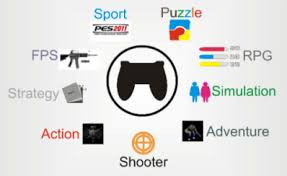

> Overall Sales by Genre

In [ ]:
df_genrecount = df_train.groupby(df_train['Genre'])[['Rank']].count().rename(columns = {'Rank':'counts'}).sort_values('counts', ascending = False)
df_genresales = df_train.groupby(df_train['Genre'])[['Global_Sales']].sum().sort_values('Global_Sales', ascending = False)

fig = px.treemap(
    names = df_genrecount.index, parents = ['total']*12, 
    values = df_genrecount['counts'],color=df_genresales['Global_Sales'],
                  color_continuous_scale='jet',
                  color_continuous_midpoint=np.average(df_genresales['Global_Sales'])
)
fig.show()

> Top 100 Game sales by genre

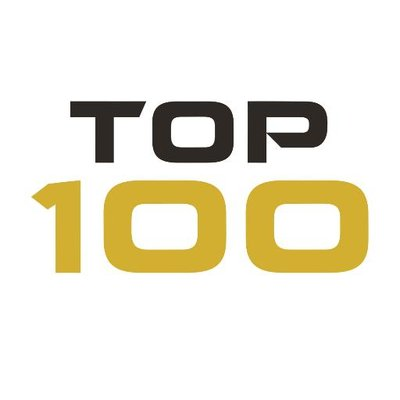

In [ ]:
df_genrecount100 = df_train[0:100].groupby(df_train['Genre'])[['Rank']].count().rename(columns = {'Rank':'counts'}).sort_values('counts', ascending = False)
df_genresales100 = df_train[0:100].groupby(df_train['Genre'])[['Global_Sales']].sum().sort_values('Global_Sales', ascending = False)
fig = px.treemap(
    names = df_genrecount100.index, parents = ['total']*11,
    values = df_genrecount100['counts'],color=df_genresales100['Global_Sales'],
                  color_continuous_scale='jet',
                  color_continuous_midpoint=np.average(df_genresales100['Global_Sales'])
)
fig.show()

> Top 10 games sold by genre

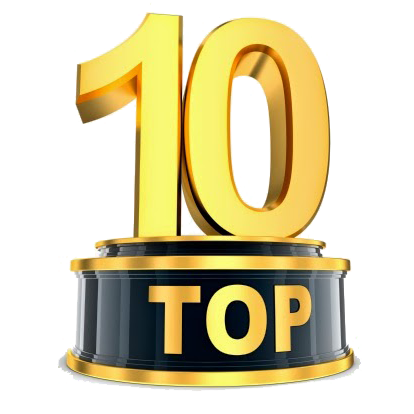

In [ ]:
df_genrecount10 = df_train[0:10].groupby(df_train['Genre'])[['Rank']].count().rename(columns = {'Rank':'counts'}).sort_values('counts', ascending = False)
df_genresales10 = df_train[0:10].groupby(df_train['Genre'])[['Global_Sales']].sum().sort_values('Global_Sales', ascending = False)
fig = px.treemap(
    names = df_genrecount10. index, parents = ['total']*7,
    values = df_genrecount10['counts'],color=df_genresales10['Global_Sales'],
                  color_continuous_scale='jet',
                  color_continuous_midpoint=np.average(df_genresales10['Global_Sales'])
)
fig.show()

<p style="text-align:center;"> Regional Sales Analysis</p>


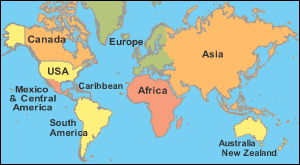

> Regional Sales By Genre

In [ ]:
region_sec = df_train[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].apply(lambda x: x. sum (), axis = 0)
region_sum = pd.DataFrame.from_dict(region_sec.to_dict(), orient = 'index', columns = ['sum']).sort_values('sum', ascending = False)

fig = px.pie(region_sum , names=region_sum.index, values='sum', template='seaborn')
fig.update_traces(pull=[0,0.01,0.01,0.01],textinfo="percent+label")

fig.show()

In [ ]:
genre = df_train['Genre'].unique()
genre_s = sorted(genre)
na_sales=[]
eu_sales=[]
jp_sales=[]
other_sales=[]
global_sales=[]
for i in genre_s:
    val= df_train[df_train.Genre==i]
    na_sales.append(val.NA_Sales.sum())
    eu_sales.append(val.EU_Sales.sum())
    jp_sales.append(val.JP_Sales.sum())
    other_sales.append(val.Other_Sales.sum())

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=na_sales,
                     y=genre_s,
                     name='North America Sales',
                     marker_color='teal',
                     orientation='h'))
fig.add_trace(go.Bar(x=eu_sales,
                     y=genre_s,
                     name='Europe Sales',
                     marker_color='purple',
                     orientation='h'))
fig.add_trace(go.Bar(x=jp_sales,
                     y=genre_s,
                     name='Japan Sales',
                     marker_color='gold',
                     orientation='h'))
fig.add_trace(go.Bar(x=other_sales,
                     y=genre_s,
                     name='Other Region Sales',
                     marker_color='deepskyblue',
                     orientation='h'))
fig.update_layout(title_text='Regional Sales by Genre',xaxis_title="Sales in $M",yaxis_title="Genre",
                  barmode='stack')
fig.show()

# Summary

What are the global sales looking like over time?

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:Orange;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px"> 
    📌 The global sales started to rise in the early 90's and for the most part, didnt slow down(except for 2001/2002) until 2011. 2009/2010 were by far the golden era for video game. Not just for the companies behind the platform, or the studio's responsible for the product, but also for the consumer. During 2009, blockbuster games like Call of Duty Modern Warfare 2, littlebigplanet(psp),and assassins creed 2 were all very good games, and were marketed extremely well leading up to the 2009 release season.

What platforms(consoles/pc) are responsible for the bulk of the games being played?.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:Orange;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px"> 
    📌 I think it's comfortable to say when it comes to the platform market, Nintendo is a powerhouse. What surprises me the most, it's not only the quantity of games they are releasing year to year that are driving the results. Nintendo shows up more in the top 5 sales, top 10 sales, and top 100 sales than any other platform by a long shot. The only competitor being Microsoft, due to how big of a hit the xbox 360 was.

Who are the top publishers, and why are they the top?.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:Orange;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px"> 
     📌Nintendo. It seems to be a recurring theme in this analysis. Nintendo has proven year after year, the quality of their games are top notch. However, you have to give credit where credit is due. Activision shows the ability to make quality games. With Call of Duty releasing every year, and a younger generation that doesnt care as much about story lines, and single player game modes, the online realm seems to be dominated by activision and EA.

And finally, what categories(Genre's) of games are people playing?

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:Orange;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px"> 
     📌This was honestly surprising to me. Platform games being as popular as they are never even crossed my mind.

<a id="1"></a>

<h1 style="background-color:#AEB6BF;font-family:newtimeroman;font-size:175%;text-align:center;border-radius:#9682A5 12px 50px;"> 
     📌I had a blast doing this analysis. I'm relativly new to DS, this is one of my first projects that i had ample time to be patient with how i wanted it to turn out. There are still some things here and there I would like to come back to, maybe in the near future! If you made it this far, I appreciate you taking the time to look it over, means a lot to me!